# Simulazione 2022 06 08

## Teoria

1. Si illustri la complessità computazionale della convoluzione di un’immagine con un filtro e si descrivano brevemente
una o più tecniche per migliorare l’efficienza di tale operazione.

L'applicazione di un filtro di convoluzione ha una complessità computazionale di m quadro a causa delle moltiplicazioni e somme che devono essere eseguite affinché si possa applicare completamente il filtro. Una delle tecniche che può essere utilizzate per migliorare la complessità è quella di separare il filtro, sempre se il filtro generale lo permette, dividendolo in un filtro riga ed un filtro colonna. In questo modo per applicare il filtro la procedura è questa: Si applica il primo filtro all'immagine, ottenendo così un'immagine intermedia che chiameremo I', successivamente a questa immagine intermedia gli verrà applicato il rimanente filtro, in questo modo la complessità computazionale scenderà drasticamente diventando 2m. 

2. Definire formalmente l’operatore di apertura della morfologia matematica e illustrarne brevemente il funzionamento.

L'operatore di apertura che fa riferimento alla morofologia matematica è composto da due operazioni principali: Erosione seguita da Dilatazione. Attraverso questo operatore morfologico è possibile rimuovere piccole zone all'interno della nostra immagine ed è inoltre possibile rimuovere le zone debolmente connesse. La quantità di oggetti che si andrà a cancellare però dipende esclusivamente dalla dimensione e dalla forma dell'elemento strutturante che si andrà ad utilizzare per tale operazione.

3. Descrivere lo spazio colore RGB e illustrarne brevemente vantaggi e svantaggi.

Lo spazio dei colori Red, Green e Blue, può essere utilizzato come codifica per rappresentare le immagini a colori. Una immagine di tipo RGB, non è altro che un tensore 3D, in cui avremo 3 diversi layer, un layer per il colore Red, un layer per il colore Green ed un layer per il colore Blue. Lo spazio di colori RGB può essere visto come un cubo, dove al suo interno sono presenti tutte le combinazioni possibili delle tre tonalità, uno dei primi svantaggi però nell'utilizzo di questa codifica sta nel fatto che le diverse sfumature in questo spazio non sono così definite per l'occhio umano, rendendole quasi impercettibili per i nostri occhi, un vantaggio invece sta nel fatto della semplicità con la quale possono essere maneggiati i colori. 

## Esercizio

1. Calcolare, per ogni pixel dell’immagine img, la media dei pixel in un intorno 7x7. Impostare a
zero 3 pixel lungo tutti i bordi nell’immagine risultato.

2. Calcolare l’immagine Diff in cui ciascun pixel è il valore assoluto della differenza fra il
pixel corrispondente nell’immagine originale e il valore determinato al passo precedente.

3. Eseguire l’operazione di contrast stretching su Diff.

4. Binarizzare Diff utilizzando come soglia globale il valore 128.

5. Etichettare le componenti connesse del risultato ottenuto al passo precedente; eliminare
quindi le componenti connesse con area inferiore a 15 pixel.

6. Restituire come output un’immagine grayscale in cui i pixel appartenenti alle componenti
connesse rimanenti dopo il passo precedente hanno valore 255, mentre tutti gli altri 0.

In [1]:
import numpy as np
import cv2 as cv
import va

In [45]:
def esercizio(img):
    # Parte 1
    img1 = cv.boxFilter(img, -1, (7,7))
    img1[0:3,:] = 0
    img1[-3:,:] = 0
    img1[:, 0:3] = 0
    img1[:, -3:] = 0
    # Parte 2
    diff = np.abs(img - img1)
    # Parte 3
    alpha = np.percentile(diff, 5)
    beta = np.percentile(diff, 95)
    
    den = (beta - alpha) if alpha != beta else 1
    diff = 255 * (diff - alpha)/den
    diff = diff.astype(np.uint8)
    # Parte 4
    _, img2 = cv.threshold(diff, 128, 255, cv.THRESH_BINARY)
    # Parte 5
    n, cc, stats, _ = cv.connectedComponentsWithStats(img2)
    for comp in range(1, n):
        area = stats[comp, cv.CC_STAT_AREA]
        if area < 15:
            cc[cc == comp] = 0
    
    cc[cc > 0] = 255
    return cc


In [56]:
def esercizio_ottimo(img):
    img1 = cv.boxFilter(img, -1, (7,7))
    img1[0:3,:], img1[-3:,:], img1[:,0:3], img1[:,-3:] = 0,0,0,0
    Diff = np.abs(img - img1)
    v_min, v_max = Diff.min(), Diff.max()
    if v_max > v_min:
        Diff = (255 * (Diff - v_min)/(v_max - v_min)).astype(np.uint8)
    _, bin_img = cv.threshold(Diff, 128, 255, cv.THRESH_BINARY)
    n, cc, stats, _ = cv.connectedComponentsWithStats(bin_img)
    toRemove = np.argwhere(stats[:, cv.CC_STAT_AREA] < 15)
    return np.where(np.isin(cc, toRemove), 0, bin_img).astype(np.uint8)

    

""
""

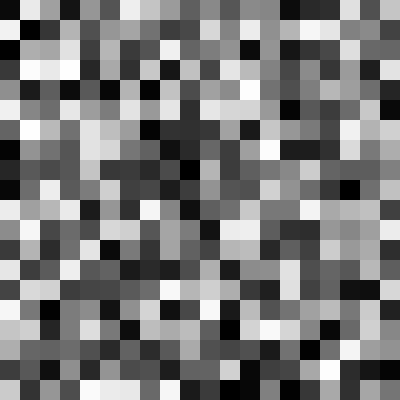

In [43]:
img = np.random.randint(0, 255, (20, 20), dtype=np.uint8)
va.show(img)

,
,

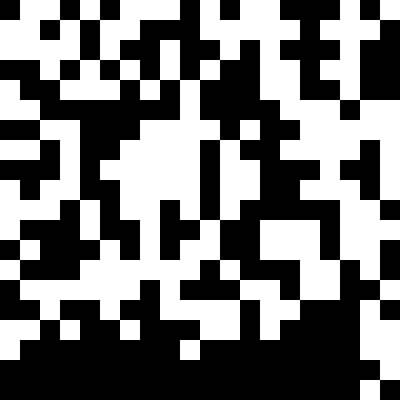
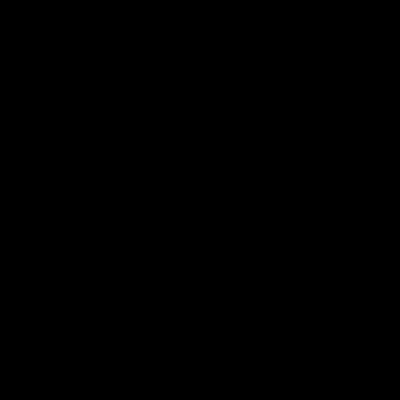

In [57]:
o = esercizio(img)
o2 = esercizio_ottimo(img)
va.show(o, o2)